<h1 align='center'>Unsupervised Learning</h1>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Clustring

In [4]:

from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [6]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

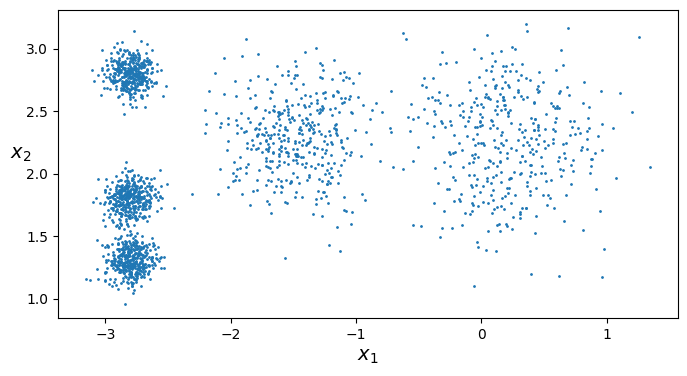

In [8]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## K-means

In [9]:
from sklearn.cluster import KMeans
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X)

In [10]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], shape=(2000,), dtype=int32)

In [11]:
y_pred is kmeans.labels_

True

In [12]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

### Inertia
To select the best model, we will need a way to evaluate a K-mean model's performance. Unfortunately, clustring is an unsupervised learning task, so there is no ground truth to compare against.

In [14]:
kmeans.inertia_

224.07433122515724

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [15]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

np.float64(224.07433122515636)

### Mini-batch K-means

In [18]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [19]:
minibatch_kmeans.inertia_

211.6594510571261

### Finding the best number for k

In [20]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

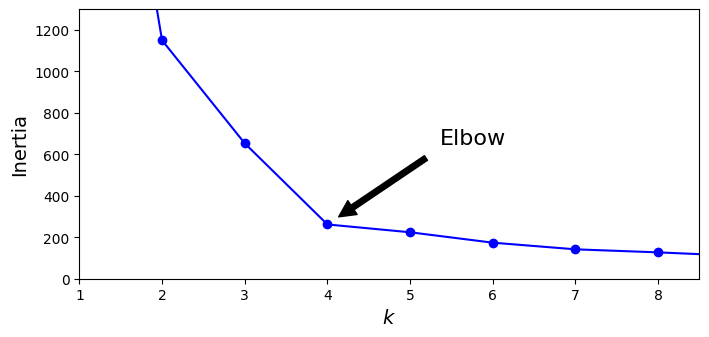

In [26]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

### Silhouette Score as a function of K:

In [27]:
from sklearn.metrics import silhouette_score  
silhouette_score(X,kmeans.labels_)

np.float64(0.6267891051050735)

In [28]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

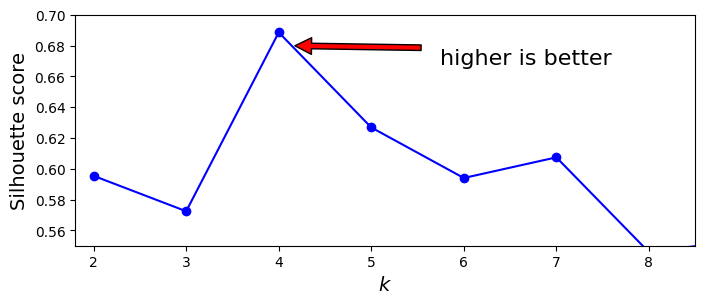

In [36]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('higher is better',
             xy=(4, 0.68),
             xytext=(0.55, 0.80),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='red', shrink=0.1)
            )
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

## DBSCAN

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,y=make_moons(n_samples=300,noise=0.05)

In [3]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2,min_samples=5)
labels=dbscan.fit_predict(X)

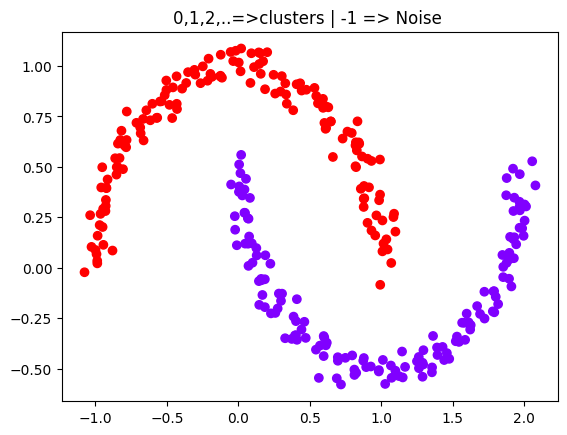

In [5]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow')
plt.title("0,1,2,..=>clusters | -1 => Noise ")
plt.show()

### Gaussian Mixture Model (GMM)

In [6]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

#Sample data
X=np.vstack([
  np.random.normal([0,0],1,size=(100,2)),
  np.random.normal([5,5],1,size=(100,2))
])


In [7]:
gmm=GaussianMixture(n_components=2,covariance_type='full',random_state=42)
gmm.fit(X)

GaussianMixture(n_components=2, random_state=42)

In [9]:
# Predict cluster probabilities [soft assignments]
probs=gmm.predict_proba(X)
probs

array([[9.99999997e-01, 3.17941025e-09],
       [9.99958465e-01, 4.15348689e-05],
       [1.00000000e+00, 1.15056835e-15],
       [9.99999993e-01, 7.27649317e-09],
       [1.00000000e+00, 1.22923327e-10],
       [1.00000000e+00, 4.92063408e-15],
       [1.00000000e+00, 7.99737386e-15],
       [9.99999952e-01, 4.79130174e-08],
       [1.00000000e+00, 4.25169632e-14],
       [9.99999899e-01, 1.00779743e-07],
       [1.00000000e+00, 7.05397255e-16],
       [9.99999999e-01, 1.34686043e-09],
       [1.00000000e+00, 4.12048783e-12],
       [1.00000000e+00, 1.09687147e-13],
       [9.99998781e-01, 1.21940731e-06],
       [1.00000000e+00, 8.56117493e-19],
       [1.00000000e+00, 1.16518364e-10],
       [1.00000000e+00, 1.12502373e-11],
       [1.00000000e+00, 3.08954812e-11],
       [1.00000000e+00, 6.36179665e-16],
       [1.00000000e+00, 1.90725909e-19],
       [1.00000000e+00, 3.76064507e-12],
       [9.99999999e-01, 1.10772549e-09],
       [1.00000000e+00, 1.15909907e-14],
       [1.000000

In [12]:
#Predict cluster labels [hard assignments (0,1)]
labels=gmm.predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

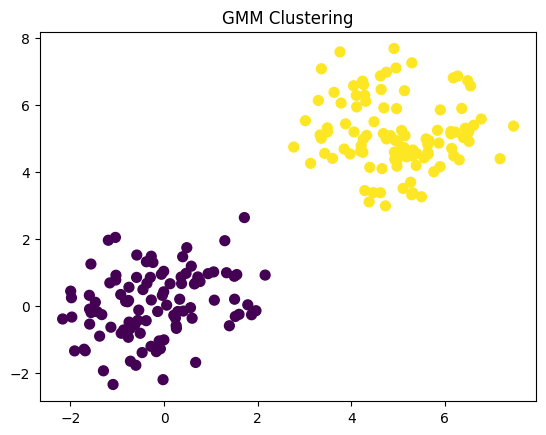

In [13]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.title("GMM Clustering")
plt.show()